In [12]:

import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/zienabesam/peach-cro-plant-village-ds")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading peach-cro-plant-village-ds.zip to ./peach-cro-plant-village-ds


100%|██████████| 34.0M/34.0M [00:03<00:00, 9.19MB/s]


In [13]:
from imutils import paths
import cv2

In [14]:
plant_directory = list(paths.list_images("peach-cro-plant-village-ds"))
plant_directory

['peach-cro-plant-village-ds/Peach Crop plant Village DS/Peach___healthy/image (326).JPG',
 'peach-cro-plant-village-ds/Peach Crop plant Village DS/Peach___healthy/image (263).JPG',
 'peach-cro-plant-village-ds/Peach Crop plant Village DS/Peach___healthy/image (234).JPG',
 'peach-cro-plant-village-ds/Peach Crop plant Village DS/Peach___healthy/image (222).JPG',
 'peach-cro-plant-village-ds/Peach Crop plant Village DS/Peach___healthy/image (330).JPG',
 'peach-cro-plant-village-ds/Peach Crop plant Village DS/Peach___healthy/image (275).JPG',
 'peach-cro-plant-village-ds/Peach Crop plant Village DS/Peach___healthy/image (71).JPG',
 'peach-cro-plant-village-ds/Peach Crop plant Village DS/Peach___healthy/image (127).JPG',
 'peach-cro-plant-village-ds/Peach Crop plant Village DS/Peach___healthy/image (259).JPG',
 'peach-cro-plant-village-ds/Peach Crop plant Village DS/Peach___healthy/image (26).JPG',
 'peach-cro-plant-village-ds/Peach Crop plant Village DS/Peach___healthy/image (170).JPG',
 

Found 2126 images belonging to 1 classes.
Found 531 images belonging to 1 classes.
Epoch 1/10
34/34 [==============================] - 13s 383ms/step - loss: 0.0058 - accuracy: 0.9934 - val_loss: 7.7337e-04 - val_accuracy: 1.0000
Epoch 2/10
34/34 [==============================] - 13s 367ms/step - loss: 6.6995e-04 - accuracy: 1.0000 - val_loss: 5.7704e-04 - val_accuracy: 1.0000
Epoch 3/10
34/34 [==============================] - 13s 378ms/step - loss: 5.1527e-04 - accuracy: 1.0000 - val_loss: 4.6038e-04 - val_accuracy: 1.0000
Epoch 4/10
34/34 [==============================] - 13s 368ms/step - loss: 4.2097e-04 - accuracy: 1.0000 - val_loss: 3.8295e-04 - val_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 12s 366ms/step - loss: 3.5505e-04 - accuracy: 1.0000 - val_loss: 3.2789e-04 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 13s 373ms/step - loss: 3.0649e-04 - accuracy: 1.0000 - val_loss: 2.8666e-04 - val_accuracy: 1.0000
Epoch 7/10
34/3

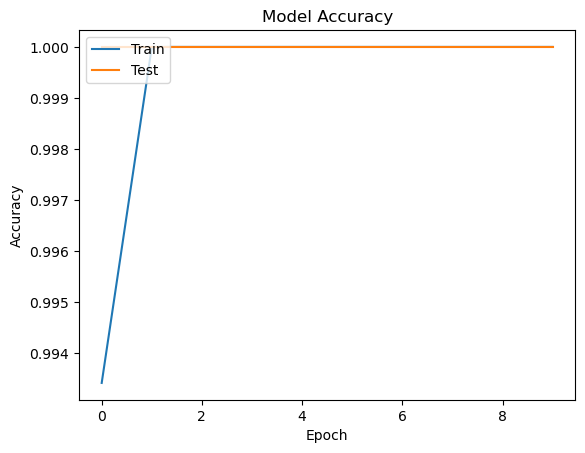

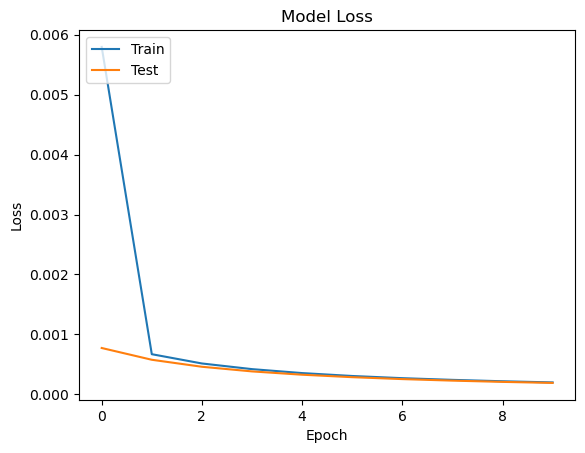

In [23]:
datagen=ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_generator=datagen.flow_from_directory(
    "peach-cro-plant-village-ds",
    target_size=(224,224),
    batch_size=64,
    class_mode='binary',
    subset='training'
)

test_generator=datagen.flow_from_directory(
    "peach-cro-plant-village-ds",
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='sigmoid',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000,activation='sigmoid'),
    tf.keras.layers.Dense(2,activation='softmax')

])



model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc="upper left")
plt.show()


import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc="upper left")
plt.show()